In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","truck"]

In [22]:
def plot_samples(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


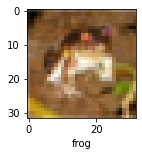

In [26]:
plot_samples(x_train,y_train,0)

In [11]:
# normalize our data
# the pixel value ranges from 0 to 255 and thus we divide them by 255 in order to limit the feature values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
model = Sequential([
                    layers.Flatten(input_shape = (32,32,3)),
                    layers.Dense(3000,activation='relu'),
                    layers.Dense(1000,activation='relu'),
                    layers.Dense(10,activation='sigmoid'),
])

In [14]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 7 , verbose = 2)

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4545 - accuracy: 0.4868


[1.45452880859375, 0.4867999851703644]

In [17]:
cnn = Sequential([
                  # colvolutional layer(detecting the features in the image)
                  layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
                  # pooling layer
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'),
                  layers.MaxPooling2D((2,2)),
                  layers.Flatten(),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(10,activation='softmax'),
])

In [18]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7745 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2453 - accuracy: 0.5592
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1005 - accuracy: 0.6100
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0065 - accuracy: 0.6489
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9613 - accuracy: 0.6661


In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0238 - accuracy: 0.6428


[1.0237596035003662, 0.642799973487854]

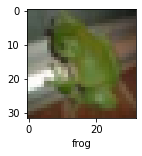

In [54]:
#  showcasing the predicted images and their names
y_test = y_test.reshape(-1,)
plot_samples(x_test,y_test,7)

In [39]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[4.34375042e-03, 2.58522865e-04, 9.48543381e-03, 5.54028153e-01,
        2.46595079e-03, 2.31238589e-01, 7.83519913e-03, 4.00864810e-04,
        1.89041227e-01, 9.02303320e-04],
       [3.21624577e-01, 4.29358810e-01, 2.87311967e-04, 5.29410245e-05,
        6.97988944e-05, 3.61236312e-06, 5.00045462e-06, 2.78258312e-06,
        2.44313359e-01, 4.28186078e-03],
       [1.15623057e-01, 3.00019741e-01, 1.03903040e-02, 1.15112998e-02,
        2.97889323e-03, 1.79432193e-03, 9.01654188e-04, 1.20949012e-03,
        5.37187099e-01, 1.83842052e-02],
       [5.52554429e-01, 1.22861871e-02, 3.89070273e-03, 5.85772505e-04,
        3.54092242e-03, 2.17054076e-05, 1.27911102e-04, 1.90287956e-05,
        4.25840080e-01, 1.13328965e-03],
       [2.91046803e-04, 4.49935585e-04, 6.14122376e-02, 4.63167801e-02,
        7.33786285e-01, 3.80650908e-02, 1.16875514e-01, 6.46401895e-04,
        2.13109725e-03, 2.55505056e-05]], dtype=float32)

In [40]:
# finding out  which element is the highest in the a specefic row of the array 
np.argmax(y_pred[0])

3

In [42]:
pred_classes= []
for i in y_pred:
  pred_classes.append(np.argmax(i))

In [44]:
pred_classes[:7]

[3, 1, 8, 0, 4, 6, 1]

In [55]:
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

In [49]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test,pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.80      0.67      1000
           1       0.69      0.83      0.75      1000
           2       0.57      0.45      0.50      1000
           3       0.52      0.43      0.47      1000
           4       0.61      0.52      0.56      1000
           5       0.57      0.55      0.56      1000
           6       0.75      0.74      0.74      1000
           7       0.70      0.69      0.69      1000
           8       0.67      0.79      0.73      1000
           9       0.75      0.63      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

